In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt
import pickle

# Loading of patients input files

In [2]:
import plastic

In [3]:
patients = list()
patients_names = list()
for f in glob.glob('medullo/patients/*.txt'):
    patients_names.append(f.split('/')[-1].replace('.txt', ''))
    p = plastic.GenotypeMatrix.from_files(f, cells_file=f'{f}.cells', mutations_file=f'{f}.muts')
    patients.append(p)

# Clustering of mutations for each patient

In [4]:
clustered_patients = list()
for ix, p in enumerate(patients):
    try:
        c = plastic.GenotypeMatrix.from_serializable_dict(
            pickle.load(open(f'medullo/clustered/{patients_names[ix]}.p', 'rb'))
        )
    except:
        c = plastic.clustering.cluster_mutations(p, k=50, n_inits=5, max_iter=50, verbose=True)
        pickle.dump(c.to_serializable_dict(), open(f'medullo/clustered/{patients_names[ix]}.p', 'wb'))
    clustered_patients.append(c)

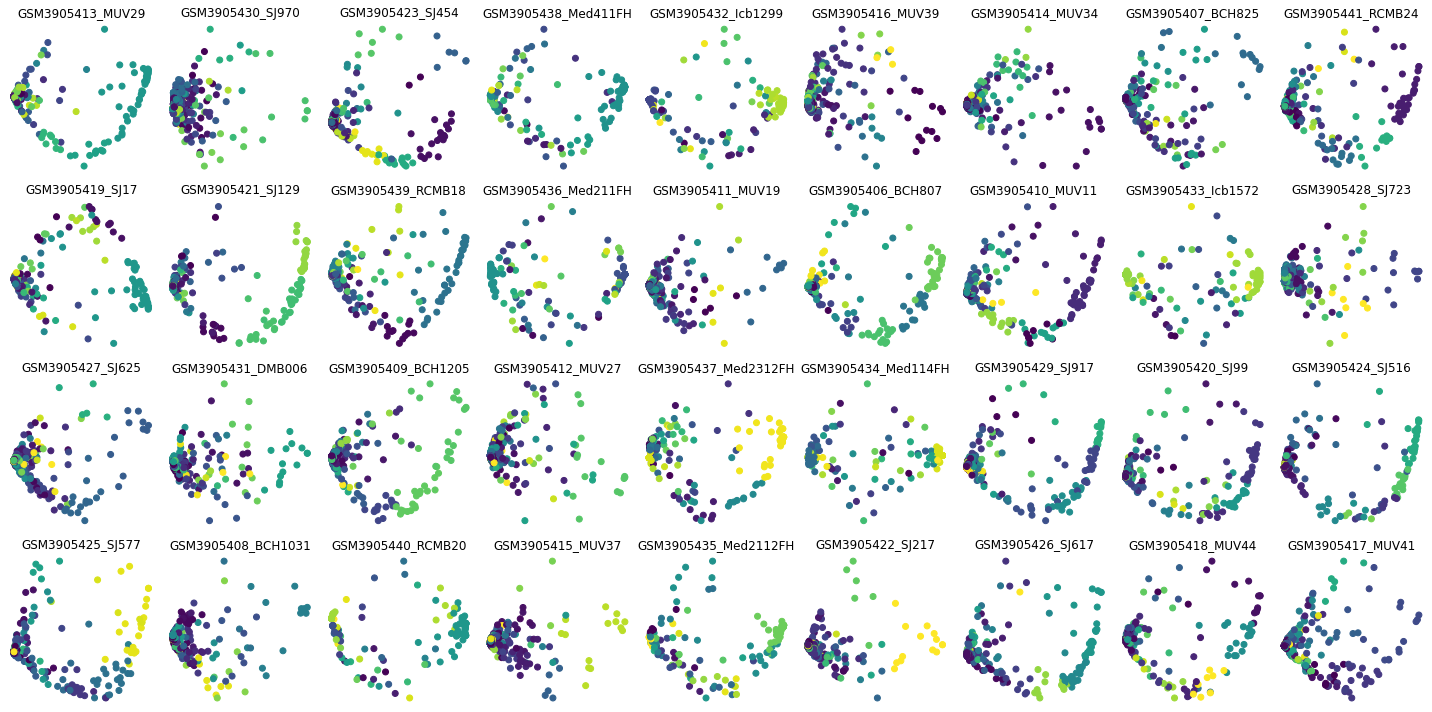

In [5]:
COLS = 9
fig, axes = plt.subplots(nrows=int(len(clustered_patients)/COLS), ncols=COLS, figsize=(20,10))
ax = axes.flatten()

for ix, _ in enumerate(clustered_patients):
    plastic.plot.clusters(patients[ix], clustered_patients[ix], ax=ax[ix])
    ax[ix].set_axis_off()
    ax[ix].set_title(patients_names[ix])
plt.tight_layout()

# Phylogeny inference (TO TEST)

In [6]:
inferred_trees = list()
for ix, p in enumerate(clustered_patients):
    try:
        t = pickle.load(open(f'medullo/inferred/{patients_names[ix]}.p', 'rb'))
    except:
        t = sasc.infer_tree(p, alphas=0.25, beta=1e-4, k=0, max_deletions=0, cores=4, get_cells=True)
        pickle.dump(t, open(f'medullo/inferred/{patients_names[ix]}.p', 'wb'))
#     t = sasc.infer_tree(p, alphas=0.25, beta=1e-4, k=1, max_deletions=2, cores=4, get_cells=True)
    inferred_trees.append(t)

In [7]:
plastic.plot.phylogeny(inferred_trees[0])

AttributeError: 'dict' object has no attribute 'is_directed'

In [10]:
type(inferred_trees[0]['inferred_tree'].with_visualization_features(support_threshold=0.2, collapse_simple_paths=True))

phylo._core.phylogenytree.SASCPhylogeny